In [1]:
import tribolium_clustering as tc
import pandas as pd
import pyclesperanto_prototype as cle
from sklearn.metrics import adjusted_rand_score, v_measure_score

lund_folder = tc.get_folder_path('lund dataset')
lund = tc.processed_dataset(lund_folder)

embryo_serosa_clustering_folder = tc.get_folder_path('embryo serosa clustering')

In [2]:
timepoint = 0 
filename_regprops_wpred = 'regprops with embryo serosa clustering UMAP(nn 400, mindist 0), hdbscan(mincl size 2000) t{}.csv'.format(timepoint)

regprops_with_cluster_prediction = pd.read_csv(embryo_serosa_clustering_folder+filename_regprops_wpred).drop(['Unnamed: 0'], axis=1)
regprops_with_cluster_prediction

,area,bbox_area,convex_area,equivalent_diameter,euler_number,extent,feret_diameter_max,filled_area,major_axis_length,minor_axis_length,...,weighted_centroid-2,image_stdev,avg distance of 4 closest points,stddev distance of 4 closest points,avg distance of 5 closest points,stddev distance of 5 closest points,avg distance of 6 closest points,stddev distance of 6 closest points,touching neighbor count,prediction
0,4348,11025,5847,20.250246,1,0.394376,33.837849,4348,34.609157,23.650850,...,33.766460,55.809849,14.430141,1.830269,15.972376,1.820836,17.020737,1.770446,6.0,-1
1,9374,14300,10653,26.160263,1,0.655524,36.027767,9374,37.636106,32.118075,...,34.925337,41.625885,19.489208,1.886238,20.571356,1.927392,21.454685,1.946990,5.0,-1
2,4760,9568,5775,20.870656,1,0.497492,31.032241,4760,32.931864,23.941198,...,34.050146,49.124729,15.597941,2.077615,16.393642,2.063778,17.268673,2.011951,9.0,-1
3,5409,8800,6321,21.779076,1,0.614659,29.883106,5409,30.028910,26.326109,...,33.759756,58.492424,16.476414,2.084768,17.096420,2.104909,17.704868,2.061071,8.0,-1
4,10575,17226,12413,27.232902,1,0.613898,41.737274,10575,41.682641,33.831529,...,36.464184,37.146133,20.974693,2.150375,21.759745,2.132292,22.428100,2.057659,6.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,18188,40145,22879,32.628375,0,0.453058,51.633323,18188,49.546883,39.800323,...,498.283670,39.597107,23.738813,1.924313,25.337162,1.898267,26.833878,1.609056,6.0,1
2966,18508,29406,21428,32.818618,1,0.629395,48.672374,18508,48.851576,39.492127,...,497.833907,29.214306,30.022137,2.290451,33.491158,2.579095,36.252316,2.476243,4.0,1
2967,3896,14400,5928,19.522710,0,0.270556,36.796739,3896,36.549562,25.905140,...,492.797296,47.933235,21.583330,1.989099,24.398783,2.108144,28.388120,1.941392,4.0,1
2968,18298,29400,21400,32.694021,1,0.622381,47.391982,18298,47.437217,40.769373,...,497.756776,41.335381,25.254723,2.058321,27.552673,2.343634,29.135168,2.259773,6.0,1


In [3]:
from skimage import io
annotation_img_name = 'serosa embryo annotation rescaled t{}.tif'.format(timepoint)
annotation_image = io.imread(lund_folder+ annotation_img_name)

In [4]:
# getting the annotation label data
label = lund.get_labels(timepoint)
cle_regp = cle.statistics_of_background_and_labelled_pixels(annotation_image,label)
annotation_labels = cle_regp['max_intensity'][1:].astype('uint8')

In [5]:
annotation_labels = cle_regp['max_intensity'][1:].astype('uint8')
annotation_labels

array([0, 0, 2, ..., 1, 1, 1], dtype=uint8)

In [6]:
annotation_dataframe = pd.DataFrame({'serosa_embryo_labels':annotation_labels})
annotation_dataframe

,serosa_embryo_labels
0,0
1,0
2,2
3,0
4,0
...,...
2965,1
2966,1
2967,1
2968,1


In [7]:
# combining dataframes
cluster_pred_and_annotation = pd.concat([regprops_with_cluster_prediction,annotation_dataframe], axis = 1)
cluster_pred_and_annotation

,area,bbox_area,convex_area,equivalent_diameter,euler_number,extent,feret_diameter_max,filled_area,major_axis_length,minor_axis_length,...,image_stdev,avg distance of 4 closest points,stddev distance of 4 closest points,avg distance of 5 closest points,stddev distance of 5 closest points,avg distance of 6 closest points,stddev distance of 6 closest points,touching neighbor count,prediction,serosa_embryo_labels
0,4348,11025,5847,20.250246,1,0.394376,33.837849,4348,34.609157,23.650850,...,55.809849,14.430141,1.830269,15.972376,1.820836,17.020737,1.770446,6.0,-1,0
1,9374,14300,10653,26.160263,1,0.655524,36.027767,9374,37.636106,32.118075,...,41.625885,19.489208,1.886238,20.571356,1.927392,21.454685,1.946990,5.0,-1,0
2,4760,9568,5775,20.870656,1,0.497492,31.032241,4760,32.931864,23.941198,...,49.124729,15.597941,2.077615,16.393642,2.063778,17.268673,2.011951,9.0,-1,2
3,5409,8800,6321,21.779076,1,0.614659,29.883106,5409,30.028910,26.326109,...,58.492424,16.476414,2.084768,17.096420,2.104909,17.704868,2.061071,8.0,-1,0
4,10575,17226,12413,27.232902,1,0.613898,41.737274,10575,41.682641,33.831529,...,37.146133,20.974693,2.150375,21.759745,2.132292,22.428100,2.057659,6.0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,18188,40145,22879,32.628375,0,0.453058,51.633323,18188,49.546883,39.800323,...,39.597107,23.738813,1.924313,25.337162,1.898267,26.833878,1.609056,6.0,1,1
2966,18508,29406,21428,32.818618,1,0.629395,48.672374,18508,48.851576,39.492127,...,29.214306,30.022137,2.290451,33.491158,2.579095,36.252316,2.476243,4.0,1,1
2967,3896,14400,5928,19.522710,0,0.270556,36.796739,3896,36.549562,25.905140,...,47.933235,21.583330,1.989099,24.398783,2.108144,28.388120,1.941392,4.0,1,1
2968,18298,29400,21400,32.694021,1,0.622381,47.391982,18298,47.437217,40.769373,...,41.335381,25.254723,2.058321,27.552673,2.343634,29.135168,2.259773,6.0,1,1


In [8]:
# getting only annotated cells
only_annotated_dataframe = cluster_pred_and_annotation[cluster_pred_and_annotation['serosa_embryo_labels']>0]
only_annotated_dataframe

,area,bbox_area,convex_area,equivalent_diameter,euler_number,extent,feret_diameter_max,filled_area,major_axis_length,minor_axis_length,...,image_stdev,avg distance of 4 closest points,stddev distance of 4 closest points,avg distance of 5 closest points,stddev distance of 5 closest points,avg distance of 6 closest points,stddev distance of 6 closest points,touching neighbor count,prediction,serosa_embryo_labels
2,4760,9568,5775,20.870656,1,0.497492,31.032241,4760,32.931864,23.941198,...,49.124729,15.597941,2.077615,16.393642,2.063778,17.268673,2.011951,9.0,-1,2
7,3485,7776,4417,18.810545,1,0.448174,32.171416,3485,32.497392,21.227547,...,70.570297,12.799197,1.633318,14.417132,1.627637,15.620045,1.690641,5.0,-1,2
8,5927,11400,7681,22.453227,1,0.519912,34.885527,5927,36.410237,25.645806,...,53.472534,15.249219,2.068857,15.957682,2.014954,16.746975,1.953150,7.0,-1,2
9,3082,9500,3914,18.055576,1,0.324421,28.861739,3082,28.983709,22.150977,...,82.047241,13.686268,2.030992,14.521888,2.018324,15.233494,1.975058,7.0,0,2
10,3742,11286,4858,19.262015,1,0.331561,30.166206,3742,31.960761,21.516830,...,70.368446,13.215273,1.920279,13.734677,1.916912,14.868278,1.865751,8.0,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,18188,40145,22879,32.628375,0,0.453058,51.633323,18188,49.546883,39.800323,...,39.597107,23.738813,1.924313,25.337162,1.898267,26.833878,1.609056,6.0,1,1
2966,18508,29406,21428,32.818618,1,0.629395,48.672374,18508,48.851576,39.492127,...,29.214306,30.022137,2.290451,33.491158,2.579095,36.252316,2.476243,4.0,1,1
2967,3896,14400,5928,19.522710,0,0.270556,36.796739,3896,36.549562,25.905140,...,47.933235,21.583330,1.989099,24.398783,2.108144,28.388120,1.941392,4.0,1,1
2968,18298,29400,21400,32.694021,1,0.622381,47.391982,18298,47.437217,40.769373,...,41.335381,25.254723,2.058321,27.552673,2.343634,29.135168,2.259773,6.0,1,1


In [9]:
def only_annotated_cells_combined_dataframe(dataset,timepoint,
                                            cluster_result_folder, cluster_result_file_name_prefix,
                                            annotation_folder,annotation_file_name_prefix,annotation_column_name,
                                           ):
    import pandas as pd
    from pyclesperanto_prototype import statistics_of_background_and_labelled_pixels
    from skimage.io import imread
    
    cluster_prediction_csv = pd.read_csv(cluster_result_folder+
                                                   cluster_result_file_name_prefix+ 
                                                   't{}.csv'.format(timepoint))
    try:
        cluster_prediction_csv = cluster_prediction_csv.drop(['Unnamed: 0'], axis=1)
    except KeyError:
        print('No Unnamed Column!')
    
    labels = dataset.get_labels(timepoint)
    annotation_img = imread(annotation_folder+ 
                              annotation_file_name_prefix + 
                              't{}.tif'.format(timepoint))
    

    cle_regionp = statistics_of_background_and_labelled_pixels(annotation_img,labels)
    annotated_labels = cle_regionp['max_intensity'][1:].astype('uint8')
    
    annotation_df = pd.DataFrame({annotation_column_name:annotated_labels})
    cluster_pred_and_annotation = pd.concat([cluster_prediction_csv,annotation_df], axis = 1)
    
    only_annotated_subset = cluster_pred_and_annotation[cluster_pred_and_annotation[annotation_column_name]>0]
    return only_annotated_subset

annotated_t3 = only_annotated_cells_combined_dataframe(lund,3,
                                            embryo_serosa_clustering_folder, 'regprops with embryo serosa clustering UMAP(nn 400, mindist 0), hdbscan(mincl size 2000) ',
                                            lund_folder,'serosa embryo annotation rescaled ','serosa_embryo_labels',
                                           )
    

In [10]:
annotated_t3

,area,bbox_area,convex_area,equivalent_diameter,euler_number,extent,feret_diameter_max,filled_area,major_axis_length,minor_axis_length,...,image_stdev,avg distance of 4 closest points,stddev distance of 4 closest points,avg distance of 5 closest points,stddev distance of 5 closest points,avg distance of 6 closest points,stddev distance of 6 closest points,touching neighbor count,prediction,serosa_embryo_labels
1,8293,20160,10294,25.113333,1,0.411359,43.278170,8293,43.655368,28.671536,...,39.616798,16.519600,2.125035,17.635231,2.156290,19.190382,2.212388,6.0,-1,2
2,8123,14168,9771,24.940545,1,0.573334,37.907783,8123,37.917640,30.750623,...,49.209549,16.835144,1.626783,17.723724,1.719780,18.494429,1.812666,7.0,-1,2
3,4559,17160,6181,20.572654,1,0.265676,37.161808,4559,35.323320,23.815616,...,85.456886,13.677819,1.848590,14.853373,1.835062,15.754004,1.813307,11.0,0,2
4,6494,17820,9693,23.147525,-1,0.364422,38.807216,6494,37.958274,26.966395,...,45.521599,15.637299,2.017247,16.756063,2.056536,17.909695,2.122908,7.0,-1,2
5,3515,8840,5097,18.864367,1,0.397624,33.120990,3515,32.101416,21.273947,...,65.317581,13.531702,2.017247,14.217814,2.056536,15.012664,2.122908,9.0,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,23487,38528,27316,35.531181,1,0.609609,54.018515,23487,52.439621,41.628193,...,39.304085,27.834908,1.305297,29.938810,1.105335,31.630810,1.132630,6.0,1,1
2978,20261,41040,23904,33.823672,1,0.493689,46.743984,20261,46.369690,43.373865,...,30.619165,28.477770,1.542990,30.188795,1.773699,32.982536,2.013643,5.0,1,1
2979,17209,31104,20142,32.032119,1,0.553273,53.263496,17209,50.788731,37.328869,...,29.718277,35.187332,2.086095,37.636340,2.312570,39.848698,2.568429,3.0,1,1
2980,18014,29172,20982,32.523992,1,0.617510,47.074409,18014,46.174950,39.954717,...,28.921413,28.443280,1.159622,32.144867,1.007431,35.133026,1.126992,4.0,1,1


In [11]:
rand_score_t3 = adjusted_rand_score(annotated_t3['prediction'],annotated_t3['serosa_embryo_labels'])

In [12]:
rand_score_t3

0.8872356894467989

In [13]:
import numpy as np
np.array(range(0,22,3))

array([ 0,  3,  6,  9, 12, 15, 18, 21])

In [14]:
def only_annotated_cells_combined_dataframe_hdbscan(dataset,timepoint,
                                            cluster_result_folder, cluster_result_file_name_prefix,
                                            annotation_folder,annotation_file_name_prefix,annotation_column_name,
                                           ):
    import pandas as pd
    from pyclesperanto_prototype import statistics_of_background_and_labelled_pixels
    from skimage.io import imread
    
    cluster_prediction_csv = pd.read_csv(cluster_result_folder+
                                                   cluster_result_file_name_prefix+ 
                                                   't{}.csv'.format(timepoint))
    try:
        cluster_prediction_csv = cluster_prediction_csv.drop(['Unnamed: 0'], axis=1)
    except KeyError:
        print('No Unnamed Column!')
    
    labels = dataset.get_labels(timepoint)
    annotation_img = imread(annotation_folder+ 
                              annotation_file_name_prefix + 
                              't{}.tif'.format(timepoint))
    

    cle_regionp = statistics_of_background_and_labelled_pixels(annotation_img,labels)
    annotated_labels = cle_regionp['max_intensity'][1:].astype('uint8')
    
    annotation_df = pd.DataFrame({annotation_column_name:annotated_labels})
    cluster_pred_and_annotation = pd.concat([cluster_prediction_csv,annotation_df], axis = 1)
    
    only_annotated_subset = cluster_pred_and_annotation[cluster_pred_and_annotation[annotation_column_name]>0]
    only_annotated_subset_non_noise = only_annotated_subset[only_annotated_subset['prediction']>=0]
    
    return only_annotated_subset_non_noise


annotated_dataframes_non_noise = [only_annotated_cells_combined_dataframe_hdbscan(lund,i,
                                                                embryo_serosa_clustering_folder, 
                                                                'regprops with embryo serosa clustering UMAP(nn 400, mindist 0), hdbscan(mincl size 2000) ',
                                                                lund_folder,
                                                                'serosa embryo annotation rescaled ',
                                                                'serosa_embryo_labels',
                                                                )
                        for i in range(0,22,3)]

annotated_dataframes = [only_annotated_cells_combined_dataframe(lund,i,
                                                                embryo_serosa_clustering_folder, 
                                                                'regprops with embryo serosa clustering UMAP(nn 400, mindist 0), hdbscan(mincl size 2000) ',
                                                                lund_folder,
                                                                'serosa embryo annotation rescaled ',
                                                                'serosa_embryo_labels',
                                                                )
                        for i in range(0,22,3)]

In [15]:
indies = np.array(range(0,22,3))
rand_scores = [adjusted_rand_score(annotated['prediction'],
                                   annotated['serosa_embryo_labels']) 
               for annotated in annotated_dataframes]
rand_scores_non_noise = [adjusted_rand_score(annotated['prediction'],
                                   annotated['serosa_embryo_labels']) 
               for annotated in annotated_dataframes_non_noise]

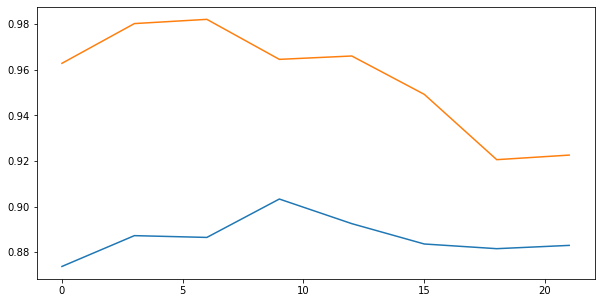

In [16]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(indies,rand_scores)
ax.plot(indies,rand_scores_non_noise)

In [17]:
v_measures= [v_measure_score(annotated['prediction'],
                                   annotated['serosa_embryo_labels']) 
               for annotated in annotated_dataframes]
v_measures_non_noise = [v_measure_score(annotated['prediction'],
                                   annotated['serosa_embryo_labels']) 
               for annotated in annotated_dataframes_non_noise]

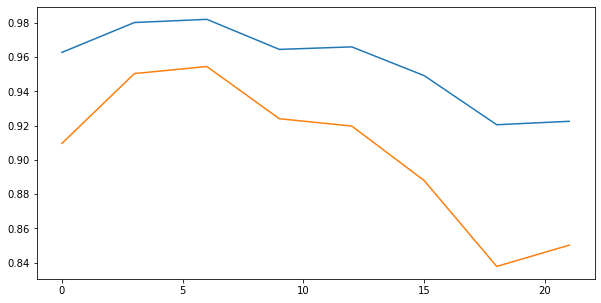

In [18]:
fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(indies,rand_scores_non_noise)
ax.plot(indies,v_measures_non_noise)

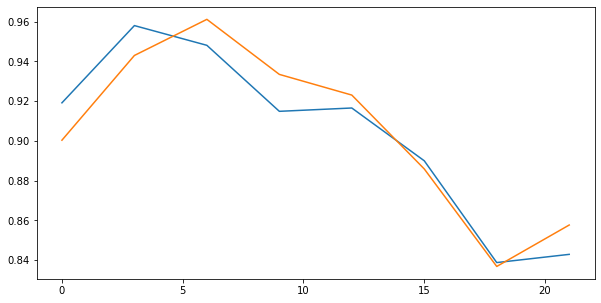

In [19]:
from sklearn.metrics import completeness_score, homogeneity_score

homogeneity_scores = [homogeneity_score(annotated['prediction'],
                                   annotated['serosa_embryo_labels']) 
                      for annotated in annotated_dataframes_non_noise]

completeness_scores = [completeness_score(annotated['prediction'],
                                   annotated['serosa_embryo_labels']) 
                      for annotated in annotated_dataframes_non_noise]

fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(indies,homogeneity_scores )
ax.plot(indies,completeness_scores)

In [20]:
def only_annotated_cells_combined_dataframe_hdbscan(dataset,timepoint,
                                            cluster_result_folder, cluster_result_file_name_prefix,
                                            annotation_folder,annotation_file_name_prefix,annotation_column_name,
                                           ):
    import pandas as pd
    from pyclesperanto_prototype import statistics_of_background_and_labelled_pixels
    from skimage.io import imread
    
    cluster_prediction_csv = pd.read_csv(cluster_result_folder+
                                                   cluster_result_file_name_prefix+ 
                                                   't{}.csv'.format(timepoint))
    try:
        cluster_prediction_csv = cluster_prediction_csv.drop(['Unnamed: 0'], axis=1)
    except KeyError:
        print('No Unnamed Column!')
    
    labels = dataset.get_labels(timepoint)
    annotation_img = imread(annotation_folder+ 
                              annotation_file_name_prefix + 
                              't{}.tif'.format(timepoint))
    

    cle_regionp = statistics_of_background_and_labelled_pixels(annotation_img,labels)
    annotated_labels = cle_regionp['max_intensity'][1:].astype('uint8')
    
    annotation_df = pd.DataFrame({annotation_column_name:annotated_labels})
    cluster_pred_and_annotation = pd.concat([cluster_prediction_csv,annotation_df], axis = 1)
    
    only_annotated_subset = cluster_pred_and_annotation[cluster_pred_and_annotation[annotation_column_name]>0]
    only_annotated_subset_non_noise = only_annotated_subset[only_annotated_subset['prediction']>=0]
    
    return only_annotated_subset_non_noise

def get_rand_score_and_v_measure(dataset,annotated_timepoints_list,
                                  cluster_result_folder, cluster_result_file_name_prefix,
                                  annotation_folder,annotation_file_name_prefix,annotation_column_name,
                                 ):
    from sklearn.metrics import adjusted_rand_score, v_measure_score
    annotated_dataframes = [only_annotated_cells_combined_dataframe_hdbscan(dataset,i,
                                                                            cluster_result_folder, 
                                                                            cluster_result_file_name_prefix,
                                                                            annotation_folder,
                                                                            annotation_file_name_prefix,
                                                                            annotation_column_name,
                                                                            )
                            for i in annotated_timepoints_list]
    
    rand_scores = [adjusted_rand_score(annotated['prediction'],
                                       annotated['serosa_embryo_labels']) 
                   for annotated in annotated_dataframes]
    
    v_measures= [v_measure_score(annotated['prediction'],
                                 annotated['serosa_embryo_labels']) 
                 for annotated in annotated_dataframes]
    
    return rand_scores, v_measures

In [21]:
finsterwalde_folder = tc.get_folder_path('Finsterwalde Labels Folder')
finsterwalder_emb_ser_clustering_folder = tc.get_folder_path('embryo serosa clustering FInsterwalde')
finster = tc.processed_dataset(finsterwalde_folder)

In [22]:
finsterwalde_annotated_timepoints = [0,3,6,9,12,15,20,25,31]
finster_rand, finster_v = get_rand_score_and_v_measure(finster,finsterwalde_annotated_timepoints,
                                                       finsterwalder_emb_ser_clustering_folder,
                                                       'regprops with embryo serosa clustering UMAP(nn 400, mindist 0), hdbscan(mincl size 2000) ',
                                                       finsterwalde_folder,
                                                       'serosa embryo annotation rescaled ',
                                                       'serosa_embryo_labels'
                                                      )

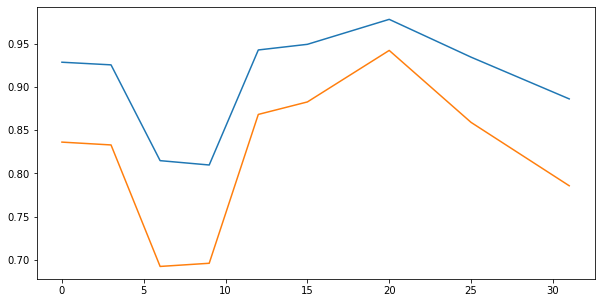

In [23]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(finsterwalde_annotated_timepoints,finster_rand)
ax.plot(finsterwalde_annotated_timepoints,finster_v)

In [24]:
wolgast_folder = tc.get_folder_path('Wolgast Labels Folder')
wolgast_emb_ser_clustering_folder = tc.get_folder_path('embryo serosa clustering Wolgast')

In [26]:
wolgast = tc.processed_dataset(wolgast_folder)

In [27]:
finsterwalde_annotated_timepoints = [0,3,6,9,12,15,20,25,31]
wolgast_rand, wolgast_v = get_rand_score_and_v_measure(wolgast,finsterwalde_annotated_timepoints,
                                                       wolgast_emb_ser_clustering_folder,
                                                       'regprops with embryo serosa clustering UMAP(nn 400, mindist 0), hdbscan(mincl size 2000) ',
                                                       wolgast_folder,
                                                       'serosa embryo annotation rescaled ',
                                                       'serosa_embryo_labels'
                                                      )

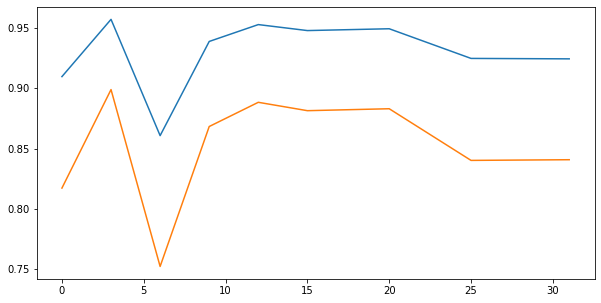

In [28]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(finsterwalde_annotated_timepoints,wolgast_rand)
ax.plot(finsterwalde_annotated_timepoints,wolgast_v)

(array([0.8  , 0.825, 0.85 , 0.875, 0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

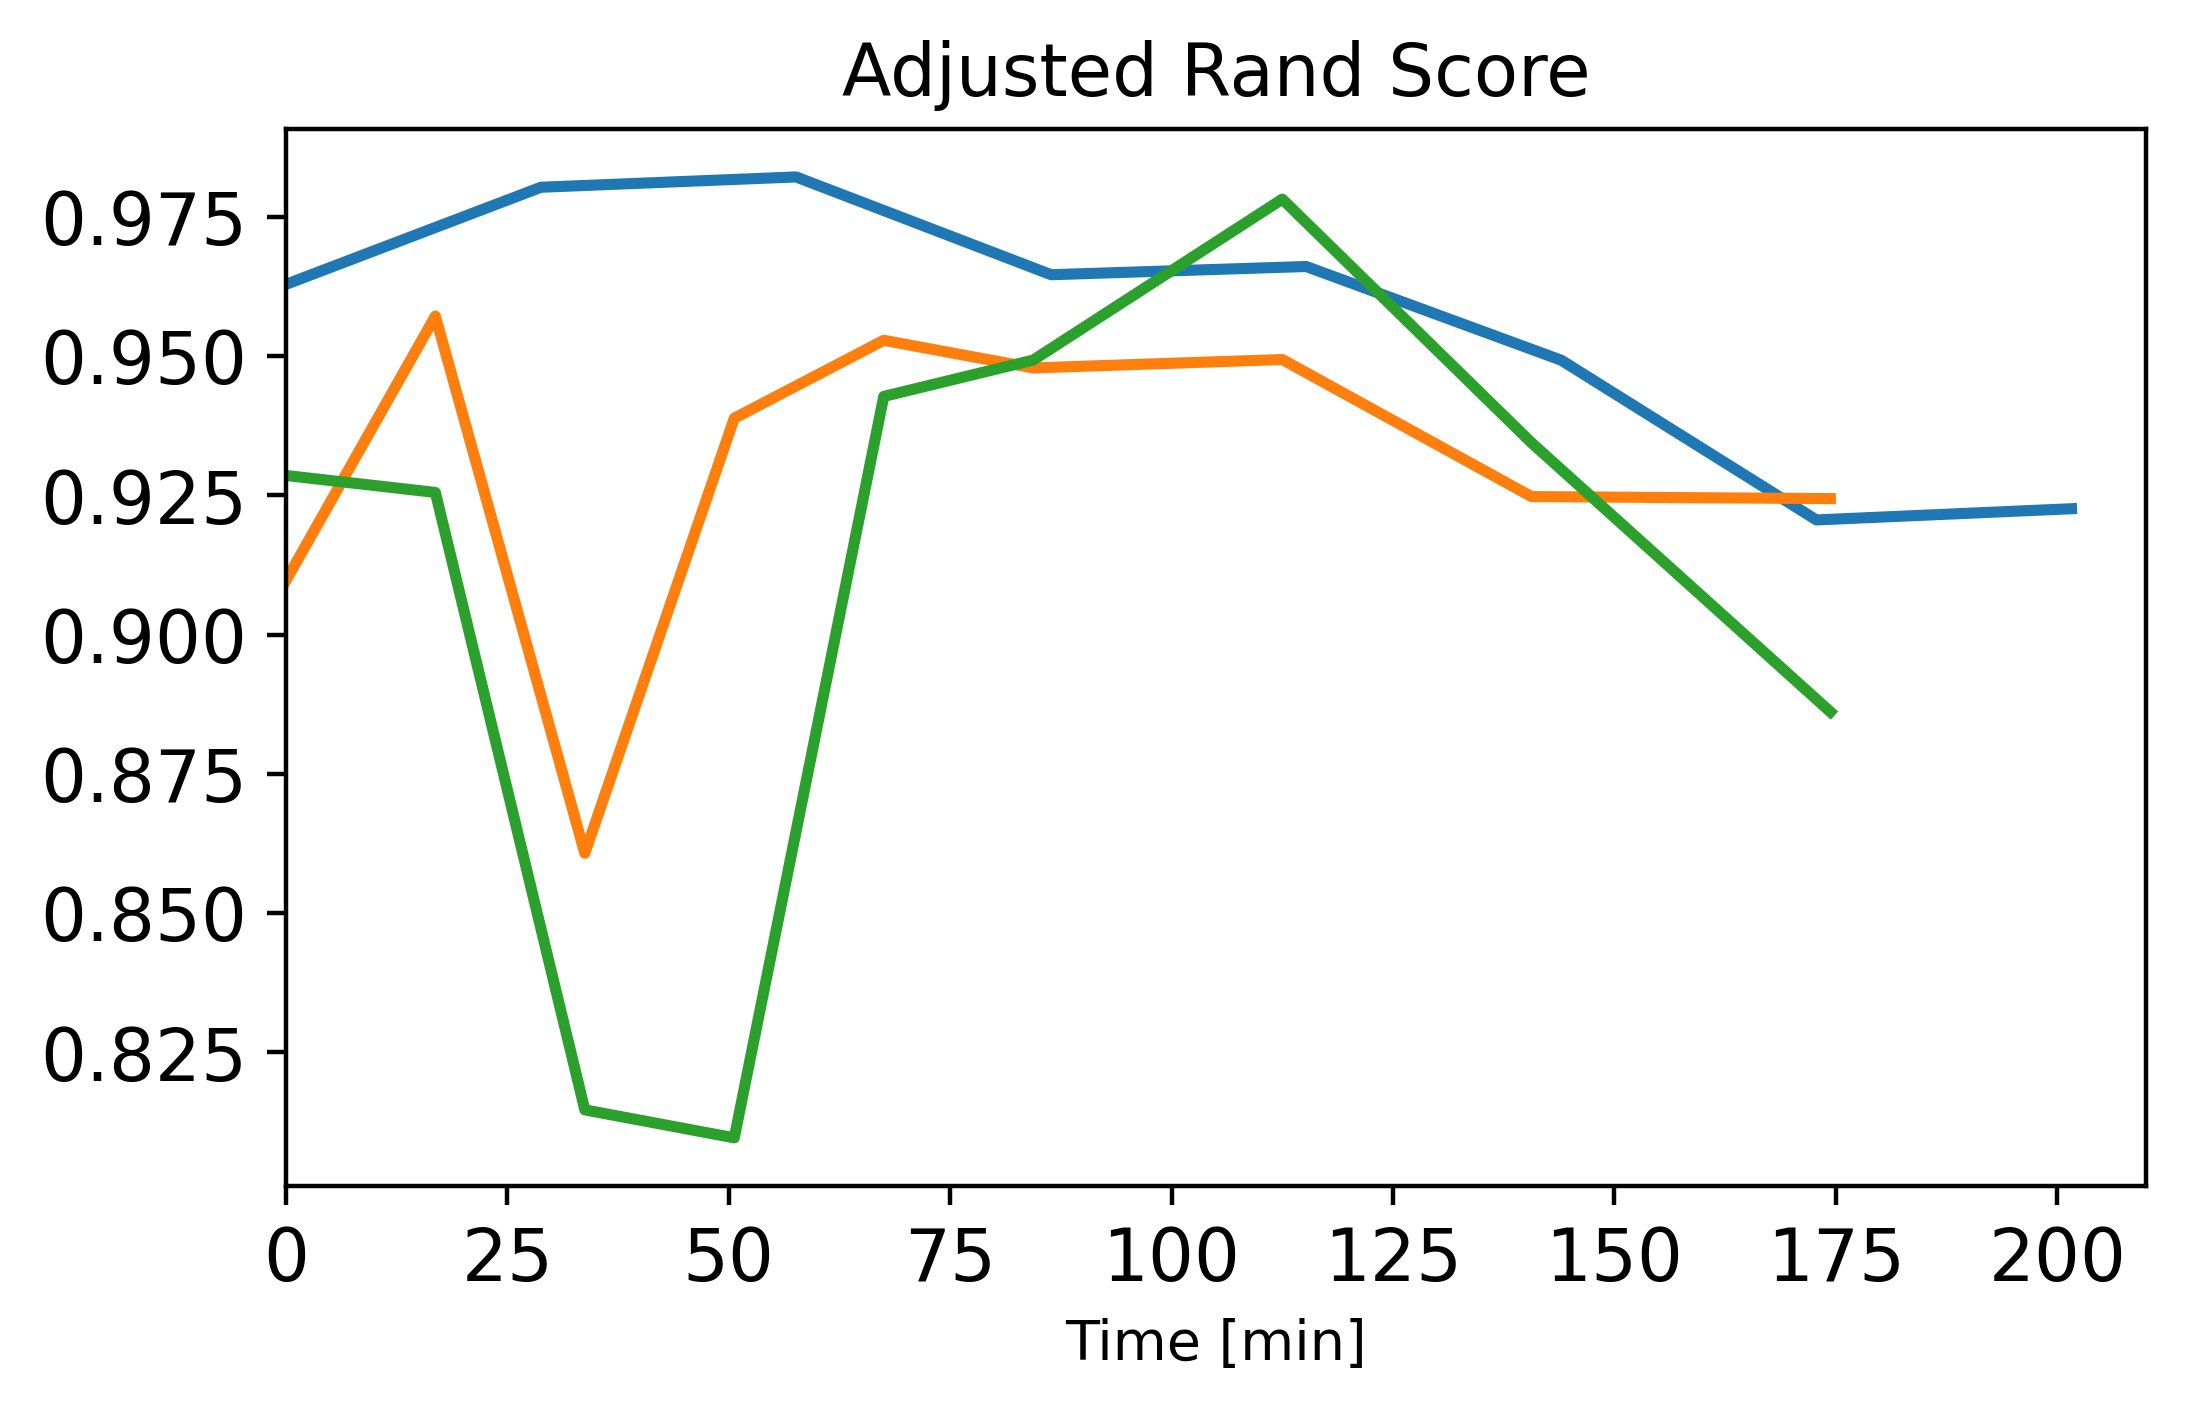

In [29]:
import beetlesafari as bs
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400


lw = 2
big_fs = 13
small_fs = 13



timeslice_lund = bs.seconds_to_minutes(bs.hours_to_seconds(4/25))
lund_time_in_min = np.array(indies)* timeslice_lund

timeslice_duration = bs.hours_to_seconds(3)/32
timeslice_duration_mi = bs.seconds_to_minutes(timeslice_duration)
x_axis_finster_wolgast = np.array(finsterwalde_annotated_timepoints)*timeslice_duration_mi


fig, ax1 = plt.subplots(1,1,figsize=(6,3.5))
ax1.plot(lund_time_in_min,rand_scores_non_noise,label='Lund',linewidth=lw)
ax1.plot(x_axis_finster_wolgast,wolgast_rand,label='Wolgast',linewidth=lw)
ax1.plot(x_axis_finster_wolgast,finster_rand,label='Finsterwlade',linewidth=lw)


ax1.set_title('Adjusted Rand Score', fontsize = big_fs)
ax1.set_xlabel('Time [min]')
ax1.set_xlim([0,210])

ax.set_xlabel('Time [min]', fontsize =big_fs)
plt.xticks(fontsize=small_fs)
plt.yticks(fontsize=small_fs)



Text(0.5, 0, 'Time [min]')

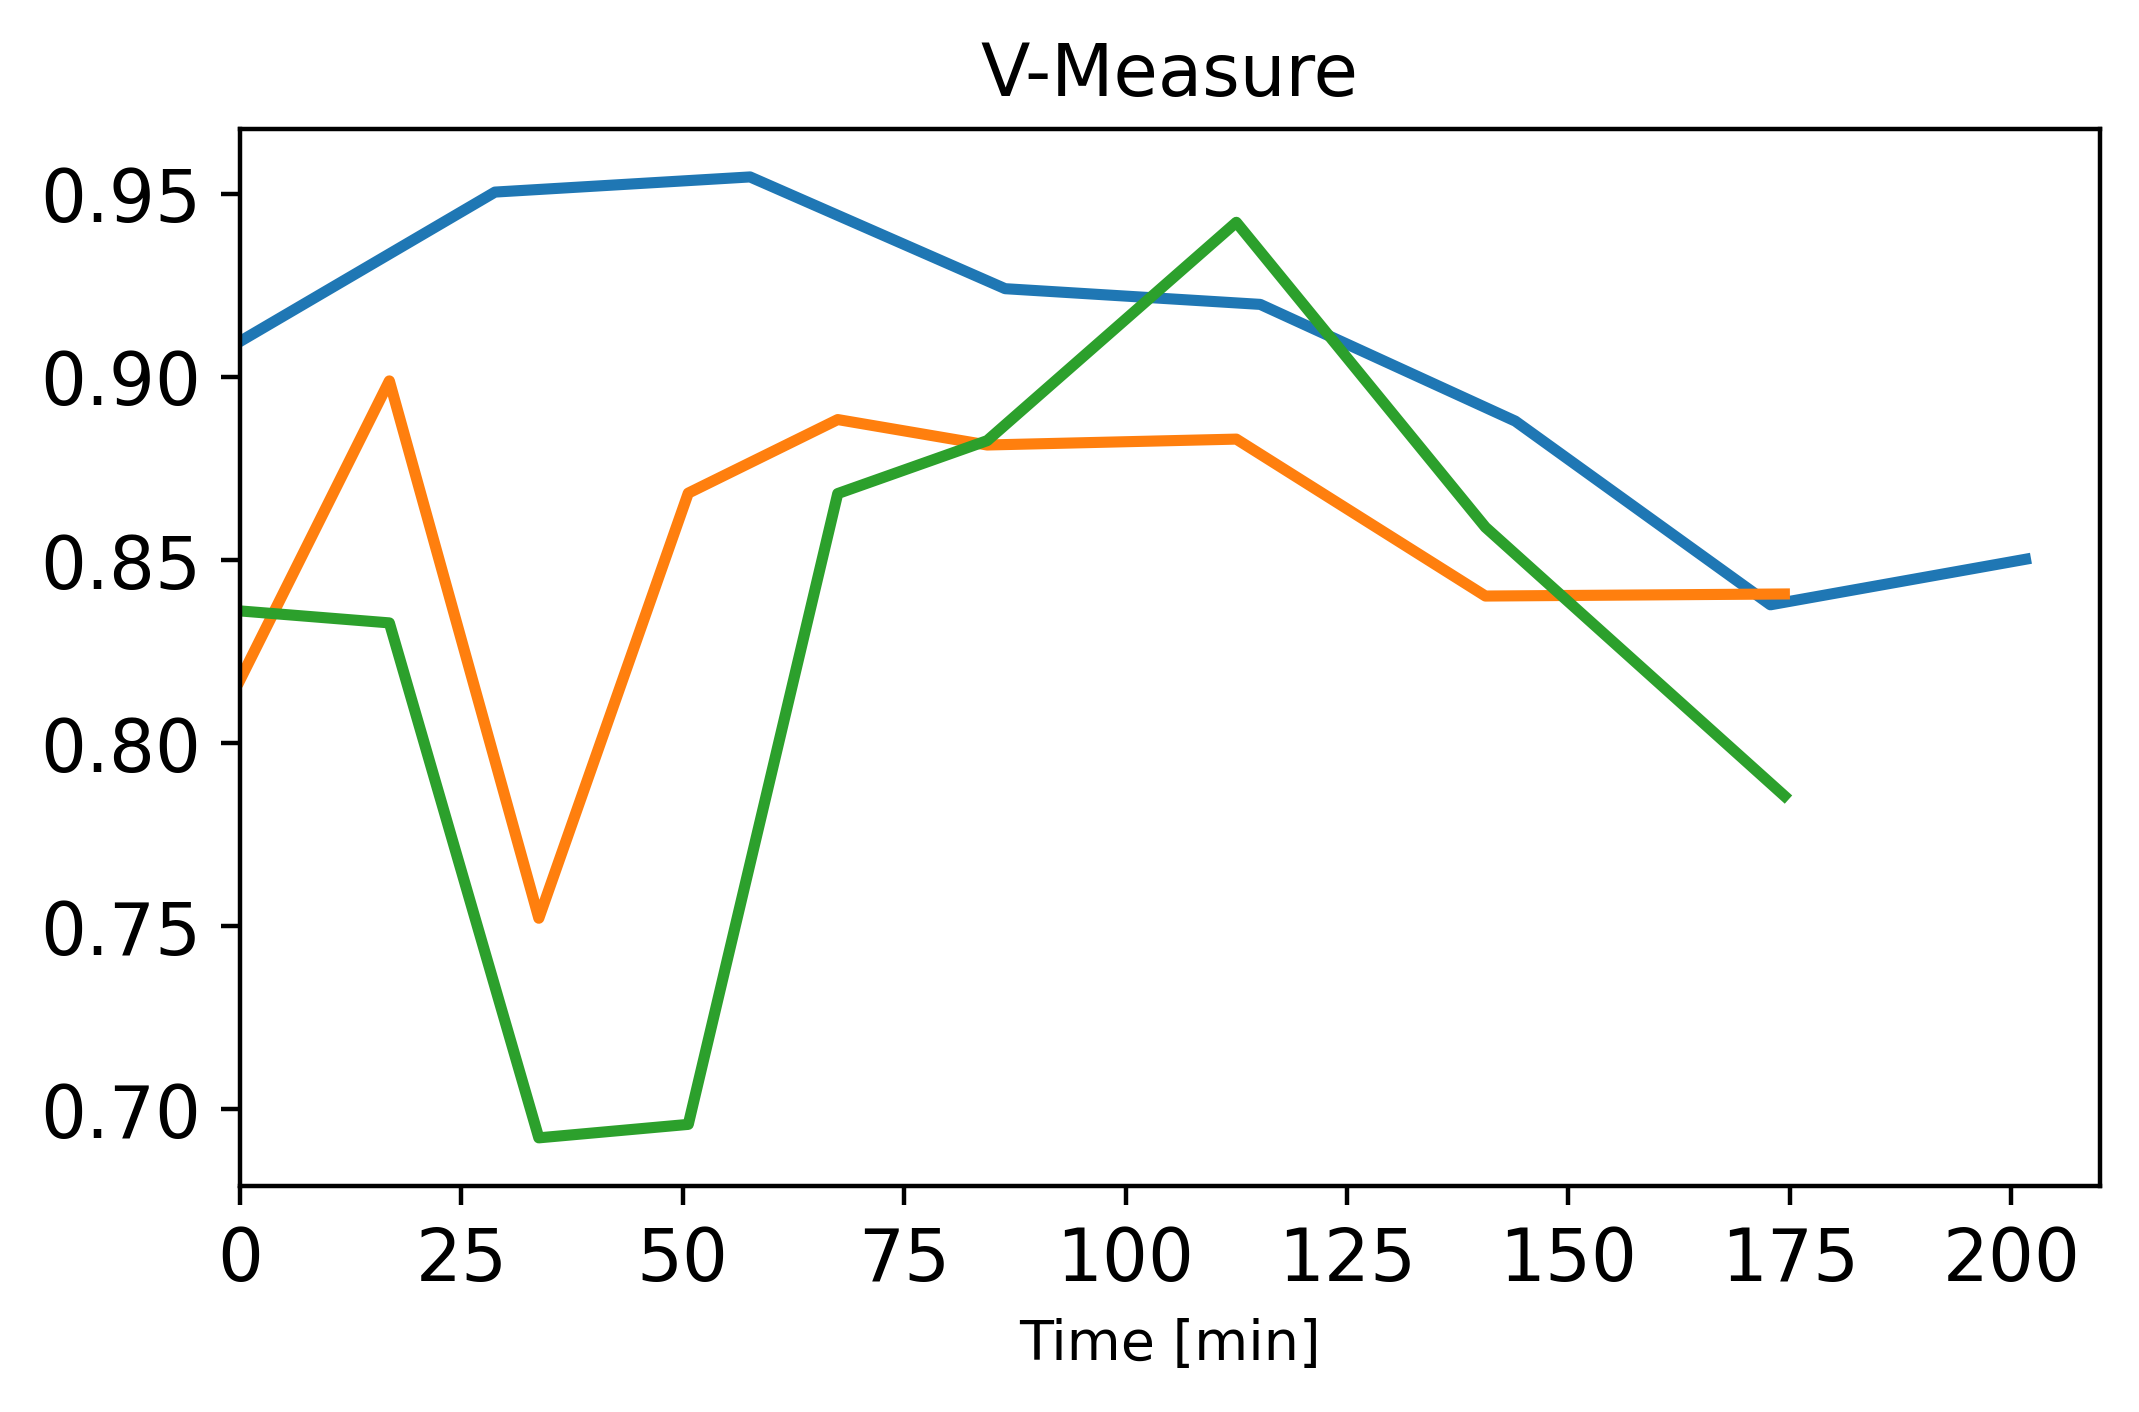

In [30]:
fig, ax1 = plt.subplots(1,1,figsize=(6,3.5))
ax1.plot(lund_time_in_min,v_measures_non_noise,label='Lund',linewidth=lw)
ax1.plot(x_axis_finster_wolgast,wolgast_v,label='Wolgast',linewidth=lw)
ax1.plot(x_axis_finster_wolgast,finster_v,label='Finsterwlade',linewidth=lw)

#handles, labels = ax1.get_legend_handles_labels()
#ax1.legend(handles, labels)
ax1.set_xlim([0,210])
ax1.set_title('V-Measure', fontsize = big_fs)
ax.set_xlabel('Time [min]', fontsize =big_fs)
plt.xticks(fontsize=small_fs)
plt.yticks(fontsize=small_fs)
ax1.set_xlabel('Time [min]')

In [32]:
from scipy.stats import pearsonr

lund_pcorrelation = pearsonr(rand_scores_non_noise,v_measures_non_noise)
lund_pcorrelation

(0.9940974353279365, 5.118440914180889e-07)

In [33]:
finster_pcorrelation = pearsonr(finster_rand,finster_v)
finster_pcorrelation

(0.990415005086843, 2.8122543731701744e-07)

In [34]:
wolgast_pcorrelation = pearsonr(wolgast_rand,wolgast_v)
wolgast_pcorrelation

(0.9967968172566014, 6.105479719608617e-09)

# Calculating Scores of Naive KMEANS clustering

In [37]:
def embryo_serosa_preprocessing(regprops):
    from sklearn.preprocessing import StandardScaler
    aspectrat = tc.min_maj_ax_to_aspectr(regprops,del_min_maj=False)
    subselection = ['area', 'bbox_area', 'extent', 'feret_diameter_max', 'max_intensity',
                    'mean_intensity', 'min_intensity', 'solidity', 'centroid-0',
                    'centroid-1', 'centroid-2', 'image_stdev',
                    'avg distance of 6 closest points',
                    'stddev distance of 6 closest points', 'touching neighbor count',
                    'aspect_ratio']
    subselected = aspectrat[subselection]
    
    scaler = StandardScaler()
    scaled = scaler.fit_transform(subselected)
    
    return scaled

def only_annotated_cells_prediction_list(dataset,timepoint,
                                         prediction_list_timepoint,
                                         annotation_folder,annotation_file_name_prefix,annotation_column_name,
                                         ):
    import pandas as pd
    from pyclesperanto_prototype import statistics_of_background_and_labelled_pixels
    from skimage.io import imread
    
    dictinput = {'prediction':prediction_list_timepoint}
    cluster_prediction_csv = pd.DataFrame(dictinput)
    
    labels = dataset.get_labels(timepoint)
    annotation_img = imread(annotation_folder+ 
                              annotation_file_name_prefix + 
                              't{}.tif'.format(timepoint))
    

    cle_regionp = statistics_of_background_and_labelled_pixels(annotation_img,labels)
    annotated_labels = cle_regionp['max_intensity'][1:].astype('uint8')
    
    annotation_df = pd.DataFrame({annotation_column_name:annotated_labels})
    cluster_pred_and_annotation = pd.concat([cluster_prediction_csv,annotation_df], axis = 1)
    
    only_annotated_subset = cluster_pred_and_annotation[cluster_pred_and_annotation[annotation_column_name]>0]
    return only_annotated_subset


def combined_list_to_timepoint_list(dataset,combined_list):
    cum_indices = dataset.cumulative_label_lengths()

    output = [combined_list[cum_indices[timepoint]:cum_indices[timepoint+1]] 
              for timepoint,nothing in enumerate(dataset.timepoints)]
    
    return output

processed_complete_props_lund = embryo_serosa_preprocessing(lund.get_combined_regionprops())

from sklearn.cluster import KMeans

kmeans_clust = KMeans(n_clusters=2,max_iter=10000, init= 'k-means++', random_state=42)

all_predictions_lund = kmeans_clust.fit_predict(processed_complete_props_lund)
individual_predictions_lund = combined_list_to_timepoint_list(lund,all_predictions_lund)

annotated_dataframes_km_lund = [only_annotated_cells_prediction_list(lund,i,
                        individual_predictions_lund[i],            
                        lund_folder,'serosa embryo annotation rescaled ','serosa_embryo_labels',
                        ) for i in indies]


No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Lund Gastrulation Correct voxel sizes//
No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Lund Gastrulation Correct voxel sizes//


In [38]:
rand_score_km_lund = [adjusted_rand_score(annotated['prediction'],
                                   annotated['serosa_embryo_labels']) 
                      for annotated in annotated_dataframes_km_lund]

v_score_km_lund = [v_measure_score(annotated['prediction'],
                                   annotated['serosa_embryo_labels']) 
                      for annotated in annotated_dataframes_km_lund]

In [39]:
processed_complete_props_wolgast = embryo_serosa_preprocessing(wolgast.get_combined_regionprops())

all_predictions_wolgast = kmeans_clust.fit_predict(processed_complete_props_wolgast)
individual_predictions_wolgast = combined_list_to_timepoint_list(wolgast,all_predictions_wolgast)

annotated_dataframes_km_wolgast = [only_annotated_cells_prediction_list(wolgast,i,
                        individual_predictions_wolgast[i],            
                        wolgast_folder,'serosa embryo annotation rescaled ','serosa_embryo_labels',
                        ) for i in finsterwalde_annotated_timepoints]


No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Wolgast Gastrulation Labels//
No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Wolgast Gastrulation Labels//


In [40]:
rand_score_km_wolgast = [adjusted_rand_score(annotated['prediction'],
                                   annotated['serosa_embryo_labels']) 
                      for annotated in annotated_dataframes_km_wolgast]

v_score_km_wolgast = [v_measure_score(annotated['prediction'],
                                   annotated['serosa_embryo_labels']) 
                      for annotated in annotated_dataframes_km_wolgast]

In [41]:
processed_complete_props_finster = embryo_serosa_preprocessing(finster.get_combined_regionprops())

all_predictions_finster = kmeans_clust.fit_predict(processed_complete_props_finster)
individual_predictions_finster = combined_list_to_timepoint_list(finster,all_predictions_finster)

annotated_dataframes_km_finster = [only_annotated_cells_prediction_list(finster,i,
                        individual_predictions_finster[i],            
                        finsterwalde_folder,'serosa embryo annotation rescaled ','serosa_embryo_labels',
                        ) for i in finsterwalde_annotated_timepoints]


No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Finsterwalde Gastrulation Labels (new timeframe)//
No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Finsterwalde Gastrulation Labels (new timeframe)//


In [42]:
rand_score_km_finster = [adjusted_rand_score(annotated['prediction'],
                                   annotated['serosa_embryo_labels']) 
                      for annotated in annotated_dataframes_km_finster]

v_score_km_finster = [v_measure_score(annotated['prediction'],
                                   annotated['serosa_embryo_labels']) 
                      for annotated in annotated_dataframes_km_finster]

Text(0.5, 0, 'Time [min]')

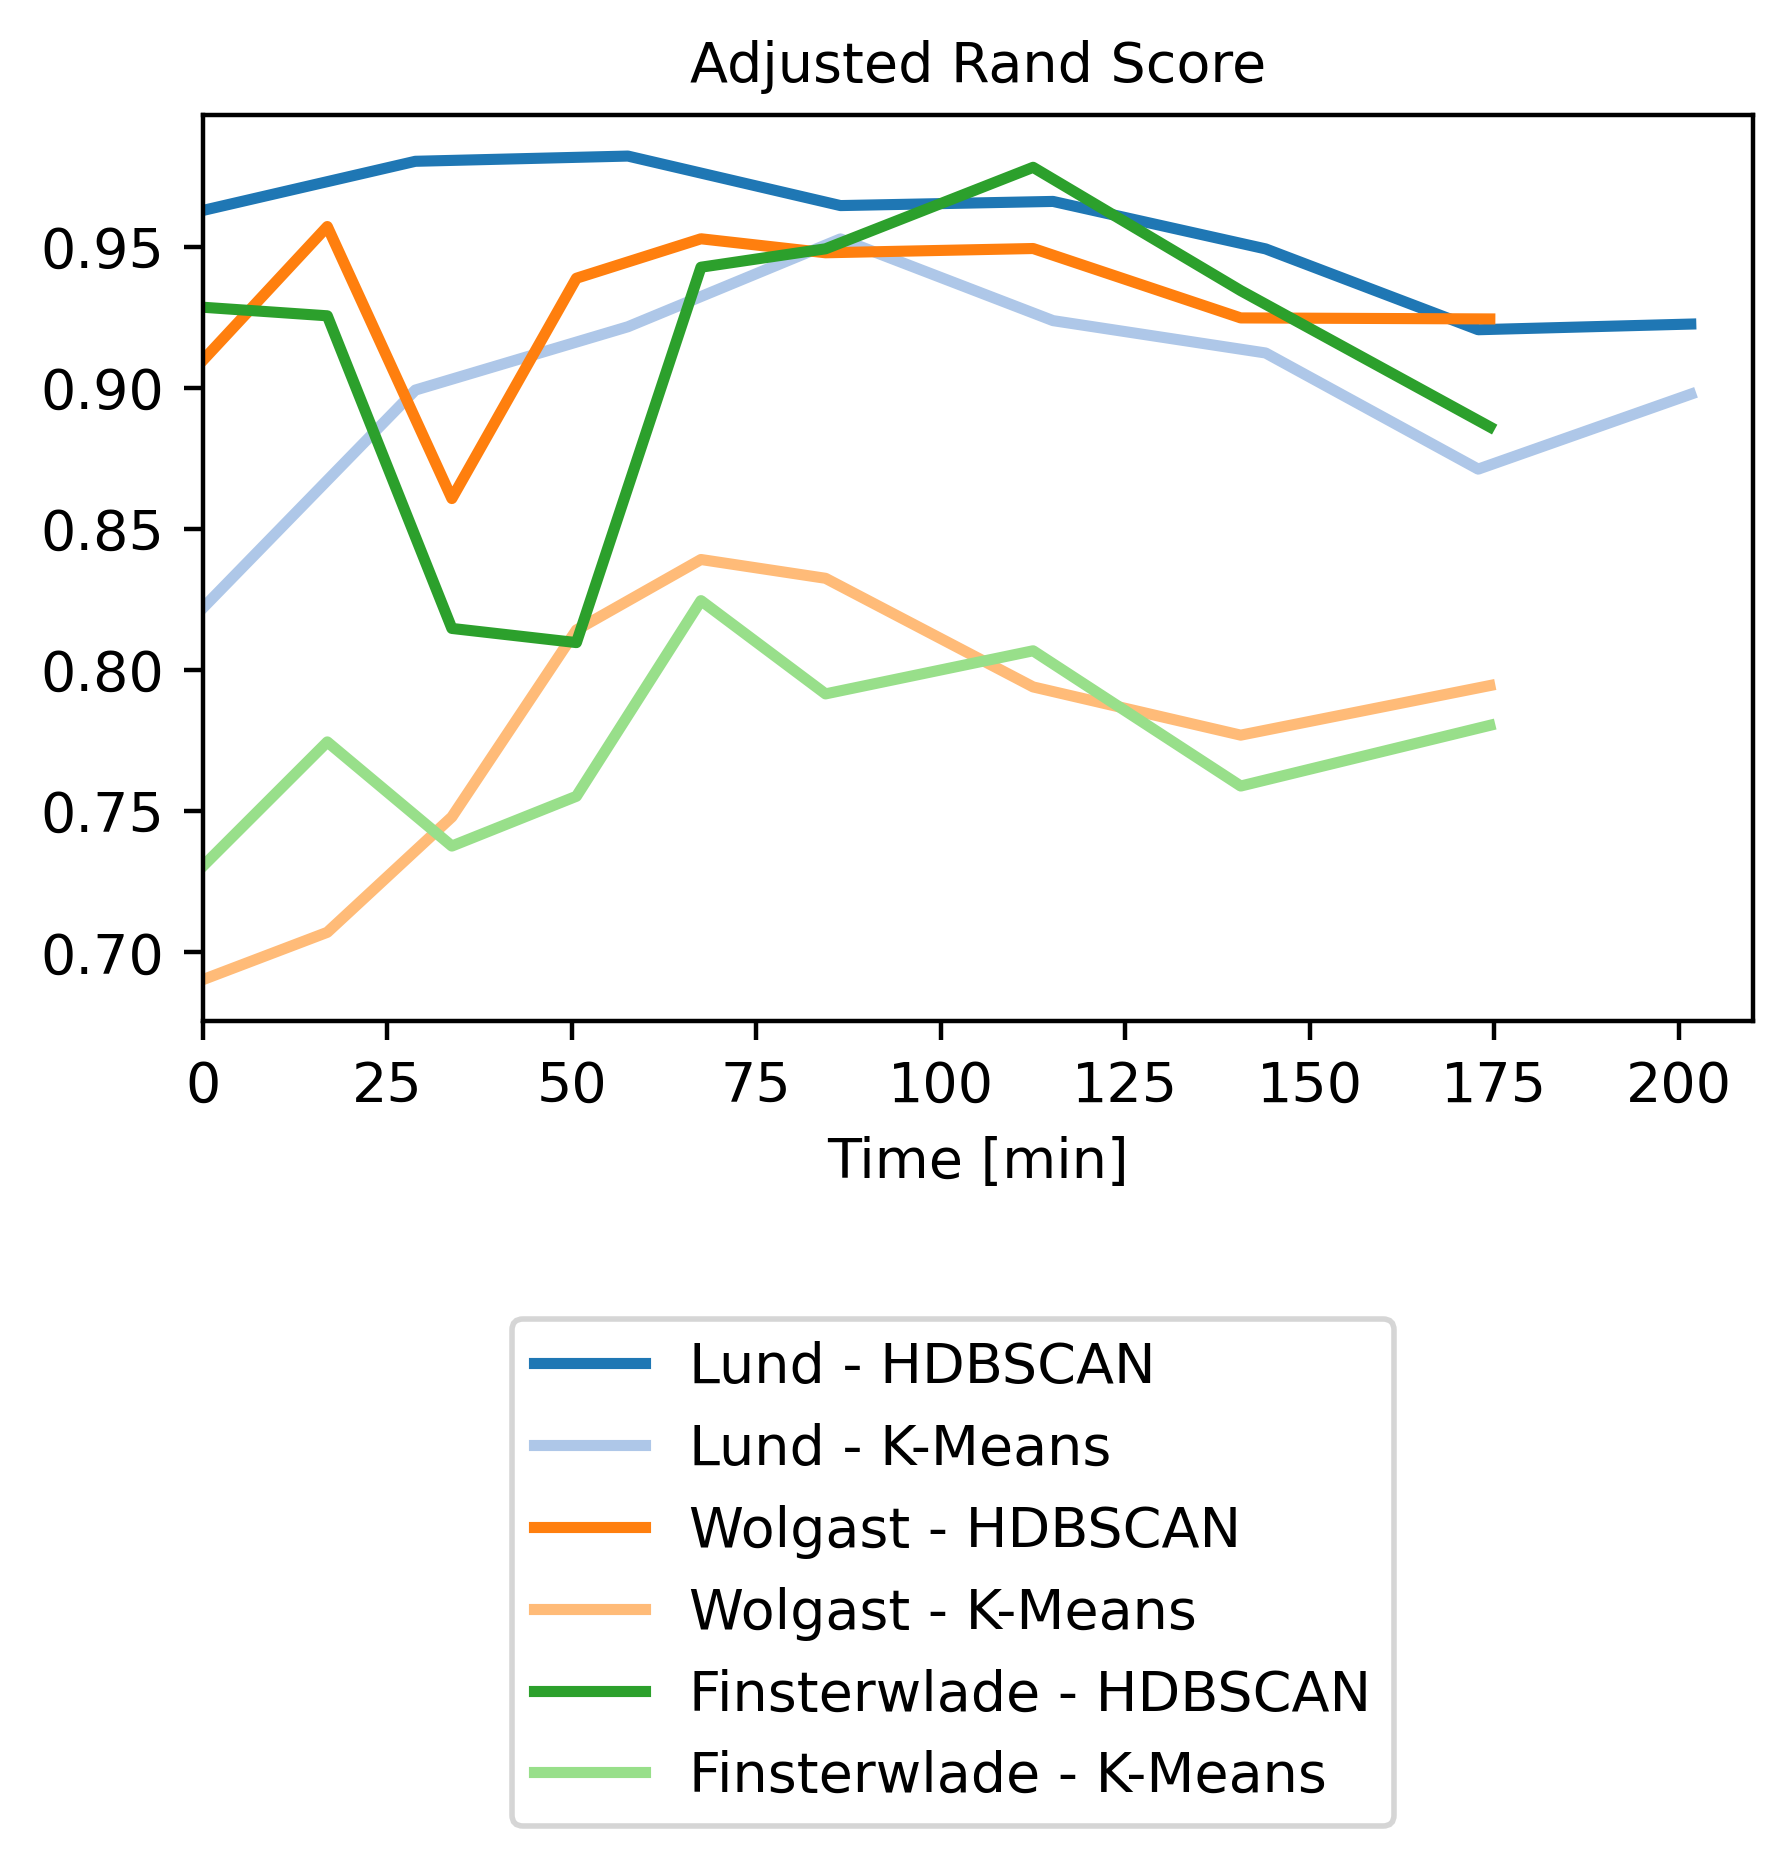

In [49]:
from matplotlib import cm
x = np.array(range(6))
cmap_list = cm.get_cmap(plt.get_cmap('tab20'))(x)[np.newaxis, :, :3][0]


lw = 2
big_fs = 10
small_fs = 10


fig, ax1 = plt.subplots(1,1,figsize = (5,3))

ax1.plot(lund_time_in_min,rand_scores_non_noise,
         label='Lund - HDBSCAN',color = cmap_list[0],
         linewidth=lw)
ax1.plot(lund_time_in_min,rand_score_km_lund,
         label='Lund - K-Means',color = cmap_list[1],
         linewidth=lw)

ax1.plot(x_axis_finster_wolgast,wolgast_rand,
         label='Wolgast - HDBSCAN',color = cmap_list[2],
         linewidth=lw)
ax1.plot(x_axis_finster_wolgast,rand_score_km_wolgast,
         label='Wolgast - K-Means',color = cmap_list[3],linewidth=lw
        )

ax1.plot(x_axis_finster_wolgast,finster_rand,
         label='Finsterwlade - HDBSCAN',color = cmap_list[4],
         linewidth=lw)
ax1.plot(x_axis_finster_wolgast,rand_score_km_finster,
         label='Finsterwlade - K-Means',color = cmap_list[5],
         linewidth=lw)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.1),fontsize =big_fs)
ax1.set_title('Adjusted Rand Score',fontsize = big_fs)
ax.set_xlabel('Time [min]', fontsize =big_fs)
plt.xticks(fontsize=small_fs)
plt.yticks(fontsize=small_fs)
ax1.set_xlim([0,210])
ax1.set_xlabel('Time [min]')

(0.0, 210.0)

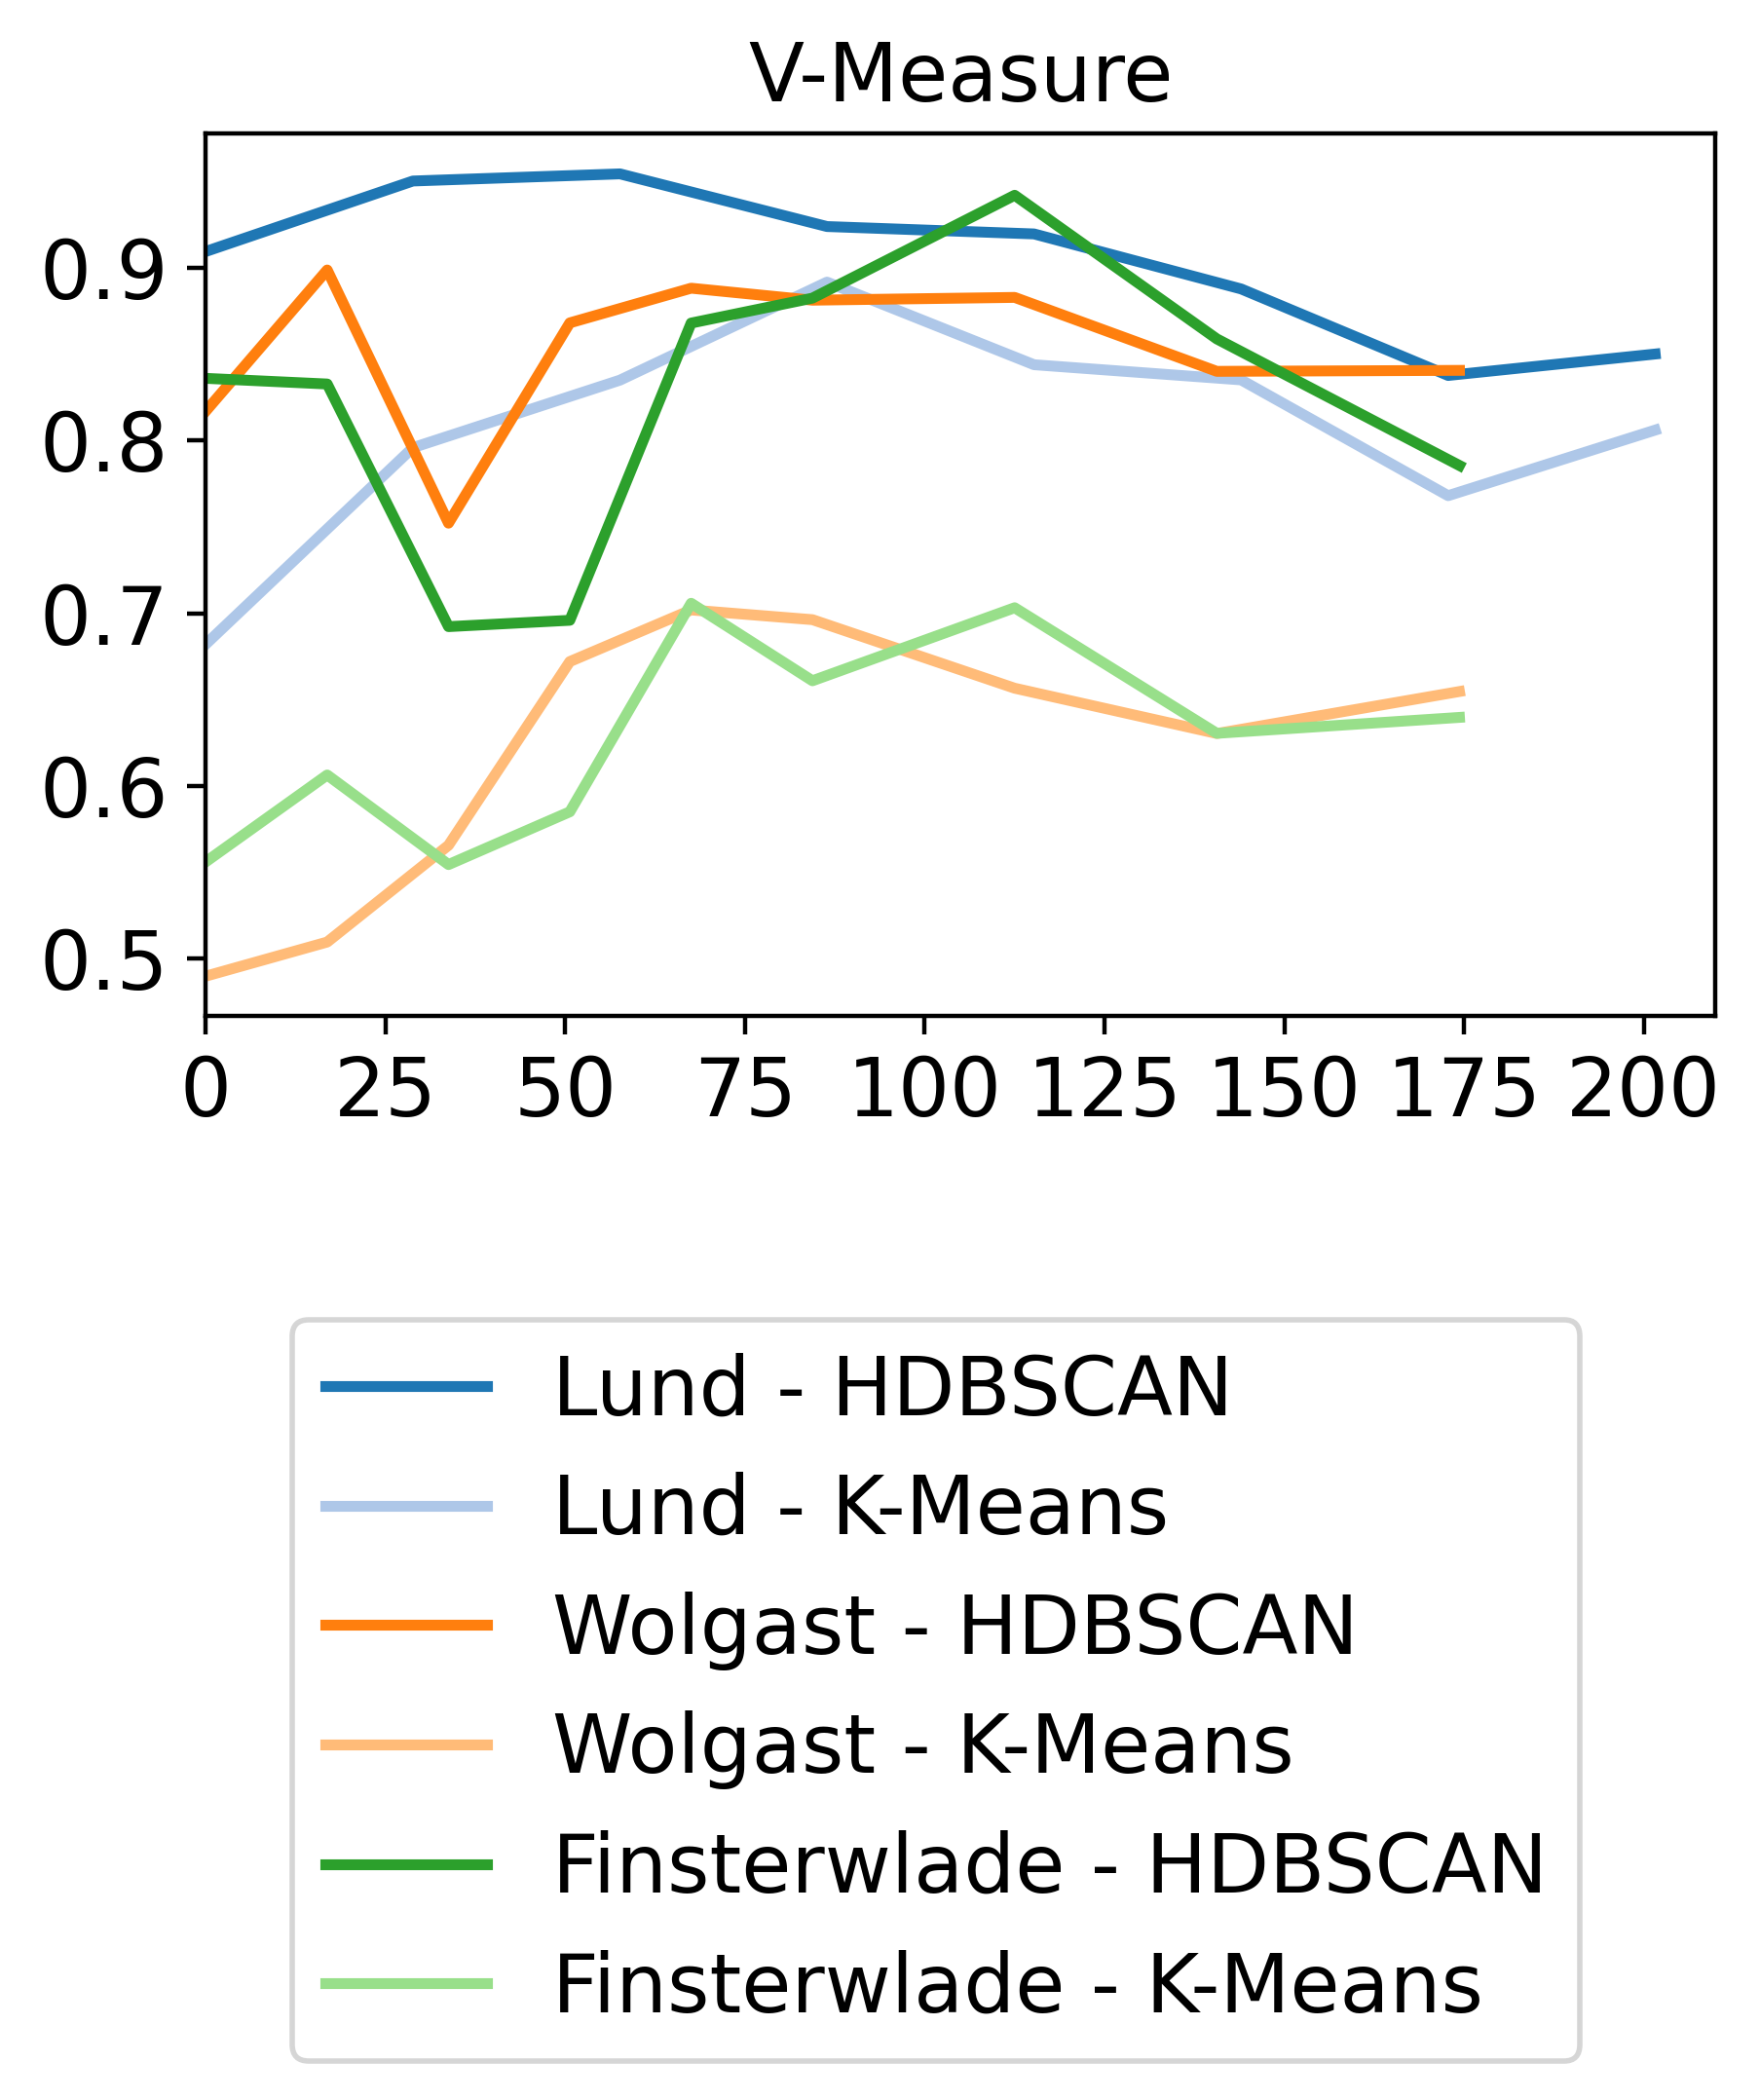

In [44]:
fig, ax1 = plt.subplots(1,1,figsize = (5,3))

ax1.plot(lund_time_in_min,v_measures_non_noise,
         label='Lund - HDBSCAN',color = cmap_list[0],
         linewidth=lw)
ax1.plot(lund_time_in_min,v_score_km_lund,
         label='Lund - K-Means',color = cmap_list[1],
         linewidth=lw)

ax1.plot(x_axis_finster_wolgast,wolgast_v,
         label='Wolgast - HDBSCAN',color = cmap_list[2],
         linewidth=lw)
ax1.plot(x_axis_finster_wolgast,v_score_km_wolgast,
         label='Wolgast - K-Means',color = cmap_list[3],linewidth=lw
        )

ax1.plot(x_axis_finster_wolgast,finster_v,
         label='Finsterwlade - HDBSCAN',color = cmap_list[4],
         linewidth=lw)
ax1.plot(x_axis_finster_wolgast,v_score_km_finster,
         label='Finsterwlade - K-Means',color = cmap_list[5],
         linewidth=lw)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.1),fontsize =big_fs)
ax1.set_title('V-Measure', fontsize=big_fs)
ax.set_xlabel('Time [min]', fontsize =big_fs)
plt.xticks(fontsize=small_fs)
plt.yticks(fontsize=small_fs)
ax1.set_xlim([0,210])

In [135]:
plotting_data_lund = pd.DataFrame({'Rand Score HDBSCAN': rand_scores_non_noise, 'Rand Score K-Means': rand_score_km_lund, 
                      'V- Measure HDBSCAN': v_measures_non_noise, 'V-Measure K-Means': v_score_km_lund})
plotting_data_wolgast = pd.DataFrame({'Rand Score HDBSCAN': wolgast_rand, 'Rand Score K-Means': rand_score_km_wolgast, 
                      'V- Measure HDBSCAN': wolgast_v, 'V-Measure K-Means': v_score_km_wolgast})
plotting_data_finster = pd.DataFrame({'Rand Score HDBSCAN': finster_rand, 'Rand Score K-Means': rand_score_km_finster, 
                      'V- Measure HDBSCAN': finster_v, 'V-Measure K-Means': v_score_km_finster})

output_folder = tc.get_folder_path('data output')

In [136]:
plotting_data_lund.to_csv(output_folder+ 'Internal CVI Scores Lund.csv')
plotting_data_wolgast.to_csv(output_folder+ 'Internal CVI Scores Wolgast.csv')
plotting_data_finster.to_csv(output_folder+ 'Internal CVI Scores Finsterwalde')